# Libraries

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from fbprophet import Prophet
from pandas.plotting import lag_plot
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Case 1

In [22]:
df = pd.read_csv('TFP.csv')

In [23]:
df

,isocode,year,rtfpna
0,USA,1950,0.617148
1,USA,1951,0.629588
2,USA,1952,0.638451
3,USA,1953,0.651858
4,USA,1954,0.646179
...,...,...,...
181,MEX,2007,1.013673
182,MEX,2008,0.991548
183,MEX,2009,0.915879
184,MEX,2010,0.941604


In [31]:
df_usa = df[mask1].drop(columns=['isocode'])
df_can = df[mask2].drop(columns=['isocode'])
df_mex = df[mask3].drop(columns=['isocode'])

In [24]:
mask1 = df['isocode'] == 'USA'
mask2 = df['isocode'] == 'CAN'
mask3 = df['isocode'] == 'MEX'

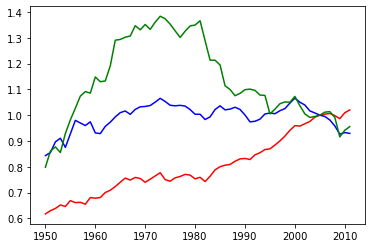

In [32]:
plt.plot(df_usa['year'], df_usa['rtfpna'], 'r-', df_can['year'], df_can['rtfpna'], 'blue', df_mex['year'], df_mex['rtfpna'], 'green')
plt.show()

In [81]:
plt.figure(figsize=(8,5))
sns.distplot(df_usa['rtfpna'], color='r-',label='USA')
sns.distplot(df_can['rtfpna'], color='blue',label='CAN')
sns.distplot(df_mex['rtfpna'], color='green',label='MEX')
plt.legend()
plt.title('Frequency distribution')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.xlabel('Average amount per day')
plt.show()

KeyError: 'rtfpna'

<Figure size 576x360 with 0 Axes>

## Forecast

In [33]:
df_usa = df_usa.rename({'year':'ds','rtfpna':'y'},axis=1)
df_can = df_can.rename({'year':'ds','rtfpna':'y'},axis=1)
df_mex = df_mex.rename({'year':'ds','rtfpna':'y'},axis=1)

### USA

In [36]:
df_usa.ds = pd.to_datetime(df_usa.ds, format='%Y')

In [50]:
df_usa.ds = pd.DatetimeIndex(df_usa.ds)

In [54]:
pd.set_option('display.max_rows', 63)

In [58]:
model = Prophet()
model.fit(df_usa)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


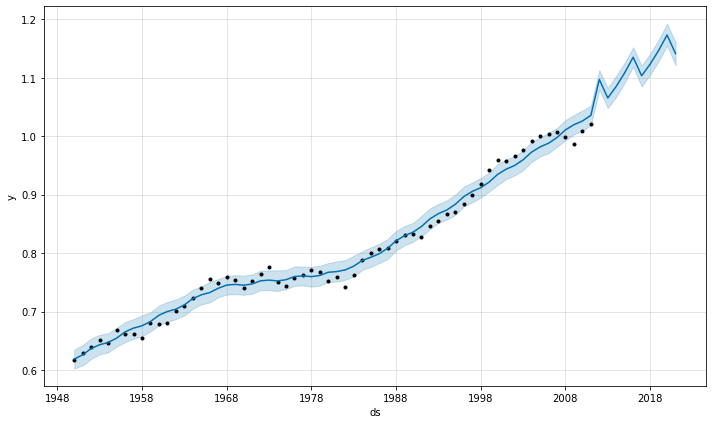

In [60]:
future = model.make_future_dataframe(periods=10,freq='Y')
forecast = model.predict(future)
forecast_plot = model.plot(forecast)
#components_plot_forecast = model.plot_components(forecast)

In [39]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1950-01-01,0.199012,0.600812,0.634553,0.199012,0.199012,0.419599,0.419599,0.419599,0.419599,0.419599,0.419599,0.0,0.0,0.0,0.618611
1,1951-01-01,0.206123,0.609234,0.641968,0.206123,0.206123,0.419816,0.419816,0.419816,0.419816,0.419816,0.419816,0.0,0.0,0.0,0.625940
2,1952-01-01,0.213234,0.619470,0.652796,0.213234,0.213234,0.423444,0.423444,0.423444,0.423444,0.423444,0.423444,0.0,0.0,0.0,0.636678
3,1953-01-01,0.220365,0.625847,0.659211,0.220365,0.220365,0.422795,0.422795,0.422795,0.422795,0.422795,0.422795,0.0,0.0,0.0,0.643160
4,1954-01-01,0.227476,0.630512,0.663562,0.227476,0.227476,0.419599,0.419599,0.419599,0.419599,0.419599,0.419599,0.0,0.0,0.0,0.647075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2016-12-31,0.673013,1.085980,1.121532,0.668381,0.677630,0.430472,0.430472,0.430472,0.430472,0.430472,0.430472,0.0,0.0,0.0,1.103484
68,2017-12-31,0.682516,1.106164,1.142060,0.676789,0.688352,0.440885,0.440885,0.440885,0.440885,0.440885,0.440885,0.0,0.0,0.0,1.123401
69,2018-12-31,0.692019,1.129081,1.164992,0.684931,0.699195,0.454661,0.454661,0.454661,0.454661,0.454661,0.454661,0.0,0.0,0.0,1.146680
70,2019-12-31,0.701522,1.155277,1.192867,0.693166,0.710088,0.471773,0.471773,0.471773,0.471773,0.471773,0.471773,0.0,0.0,0.0,1.173295


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


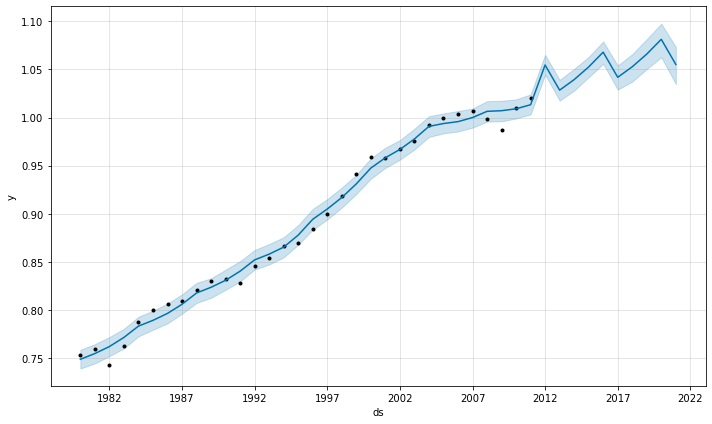

In [68]:
model = Prophet(changepoint_range=1)
model.fit(df_usa.iloc[30:,:])
future = model.make_future_dataframe(periods=10,freq='Y')
forecast = model.predict(future)
forecast_plot = model.plot(forecast)
#components_plot_forecast = model.plot_components(forecast)

### USA - Real

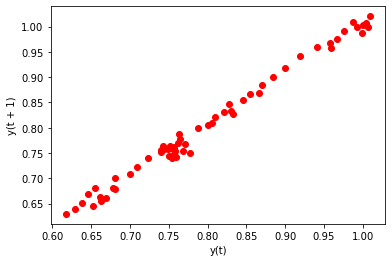

In [70]:
lag_plot(df_usa['y'], c='red')

Se existe uma relação entre o período anterior com o período seguinte.
Neste caso, ele existe uma relação mas não completamente. 

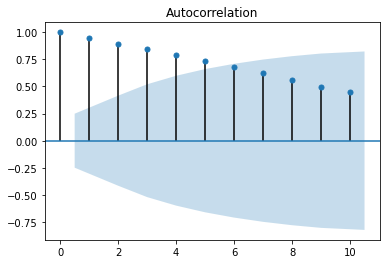

In [94]:
plot_acf(x=df_usa.y, lags=10);

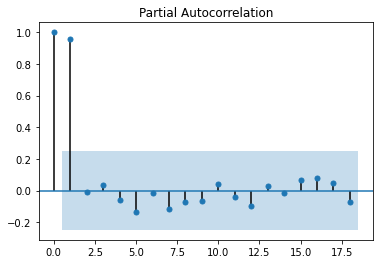

In [89]:
plot_pacf(x=df_usa.y);

Decomposing a time series into:
    
- Mean
- Trends
- Seasonal Effects
- Noise

In [91]:
res = sm.tsa.seasonal_decompose(df_usa['y'], period=6)
observed = res.observed
seasonal = res.seasonal
residual = res.resid
trend = res.trend

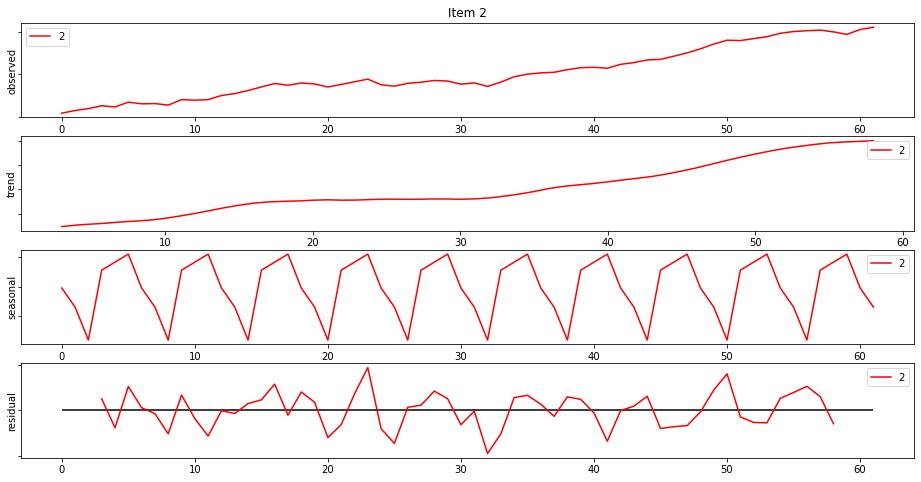

In [92]:
df_res_02 = pd.DataFrame({"observed":observed,"trend":trend, "seasonal":seasonal,"residual":residual})
plt.figure(figsize=(16,8))

plt.subplot(411)
sns.lineplot(x=df_res_02.index,y='observed',data=df_res_02,label='2',color ='red')
plt.title('Item 2')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelleft=False)

plt.subplot(412)
sns.lineplot(x=df_res_02.index,y='trend',data=df_res_02,label='2',color ='red')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelleft=False)

plt.subplot(413)
sns.lineplot(x=df_res_02.index,y='seasonal',data=df_res_02,label='2',color ='red')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelleft=False)

plt.subplot(414)
sns.lineplot(x=df_res_02.index,y='residual',data=df_res_02,label='2',color ='red')
plt.tick_params(axis='y', which='both', bottom=False, top=False, labelleft=False)
plt.hlines(y=0,xmin=df_res_02.index.min(),xmax=df_res_02.index.max())
plt.show()

In [79]:
adfuller(df_usa['y'], autolag='AIC', regression='ct')

(-1.4149604461402028,
 0.856467046010545,
 0,
 61,
 {'1%': -4.115412397821844,
  '5%': -3.485092052154145,
  '10%': -3.170590307779065},
 -302.65363491879026)

- p-value (neste não pode rejeitar que a times series é estacionária) #ver isso
- 